In [2]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('bmh')

In [16]:
df = pd.read_csv('Dataset\AAPL.csv',date_parser = True)

In [17]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [18]:
df.shape

(1258, 15)

### Visualize Close price data 

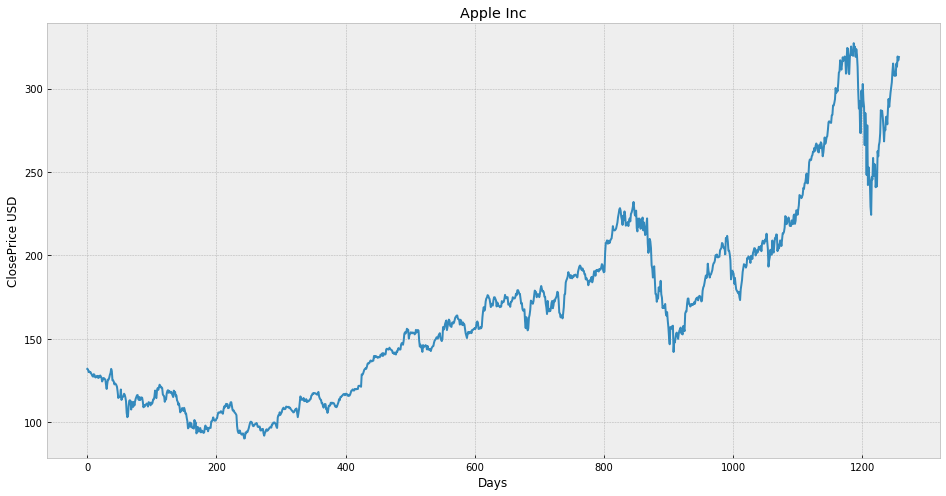

In [19]:
plt.figure(figsize=(16,8))
plt.title('Apple Inc')
plt.xlabel('Days')
plt.ylabel('ClosePrice USD')

plt.plot(df['close'])
plt.show()

#### Get Close Price

In [21]:
df = df[['close']]
df.head()

,close
0,132.045
1,131.780
2,130.280
3,130.535
4,129.960


#### Create a variable to predict 'x' days out into the future

In [24]:
future_days = 25

#### Create a new column (target) shifted 'x'  days up

In [27]:
df['Prediction'] = df[['close']].shift(-future_days)
df.head()

C:\Users\Naravith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,close,Prediction
0,132.045,126.60
1,131.780,126.44
2,130.280,126.00
3,130.535,125.69
4,129.960,122.57


In [30]:
df.head(30)
# in each tuple, close = today value and Prediction = next 25 days val

,close,Prediction
0,132.045,126.60
1,131.780,126.44
2,130.280,126.00
3,130.535,125.69
4,129.960,122.57
5,130.120,120.07
6,129.360,123.28
7,128.650,125.66
8,127.800,125.61
9,127.420,126.82


In [37]:
df.tail(26)

,close,Prediction
1232,282.80,318.89
1233,276.93,NaN
1234,268.37,NaN
1235,276.10,NaN
1236,275.03,NaN
1237,282.97,NaN
1238,283.17,NaN
1239,278.58,NaN
1240,287.73,NaN
1241,293.80,NaN


#### Create the feature dataset (X) and convert to numpy array and remove the last 'x' rows days

In [33]:
X = np.array(df.drop(['Prediction'],1))[:-future_days]

In [56]:
X

array([[132.045],
       [131.78 ],
       [130.28 ],
       ...,
       [284.43 ],
       [286.69 ],
       [282.8  ]])

####  Create target dataset (y), convert to nparray and get all of target value except the last 'x' rows or days

In [38]:
y = np.array(df['Prediction'])[:-future_days]

In [39]:
y

array([126.6 , 126.44, 126.  , ..., 319.23, 316.85, 318.89])

### Split the data into 75% train and 25% test and create the model

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [42]:
# DT Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Linear Regression model
lr = LinearRegression().fit(x_train, y_train)

#### Get the last 'x' rows of feature dataset (Last 25 days)

In [43]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)

#convert to np array
x_future = np.array(x_future)
x_future

array([[277.97],
       [242.21],
       [252.86],
       [246.67],
       [244.78],
       [229.24],
       [224.37],
       [246.88],
       [245.52],
       [258.44],
       [247.74],
       [254.81],
       [254.29],
       [240.91],
       [244.93],
       [241.41],
       [262.47],
       [259.43],
       [266.07],
       [267.99],
       [273.25],
       [287.05],
       [284.43],
       [286.69],
       [282.8 ]])

### Show the model tree and Lr prediction 

In [45]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)



[324.34 267.84 300.63 264.16 282.97 203.77 278.58 287.73 293.8  289.07
 293.16 300.63 300.63 303.74 310.13 303.74 279.44 275.15 287.05 307.71
 314.96 313.14 309.51 316.85 323.87]

[278.5432492  243.48613249 253.92680064 247.85846863 246.00561766
 230.77106526 225.9967879  248.06434096 246.73107254 259.39712254
 248.90743717 255.83847227 255.32869317 242.21168473 246.15266933
 242.70185694 263.34791058 260.36766352 266.87715052 268.75941182
 273.91602351 287.4447766  284.8762742  287.09185261 283.27831279]


#### Visualize the data

In [54]:
predictions = tree_prediction

valid = df[X.shape[0]:] #x.shape(0) = 1233
valid['Prediction'] = predictions

valid

C:\Users\Naravith\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,close,Prediction
1233,276.93,324.34
1234,268.37,267.84
1235,276.10,300.63
1236,275.03,264.16
1237,282.97,282.97
1238,283.17,203.77
1239,278.58,278.58
1240,287.73,287.73
1241,293.80,293.80
1242,289.07,289.07


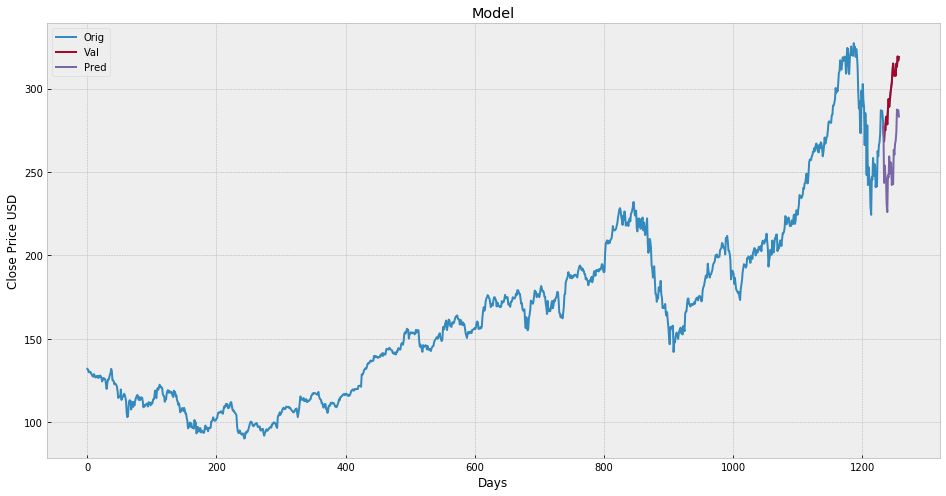

In [51]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')

plt.plot(df['close'])
plt.plot(valid[['close','Prediction']])
plt.legend(['Orig','Val','Pred'])

plt.show()

C:\Users\Naravith\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


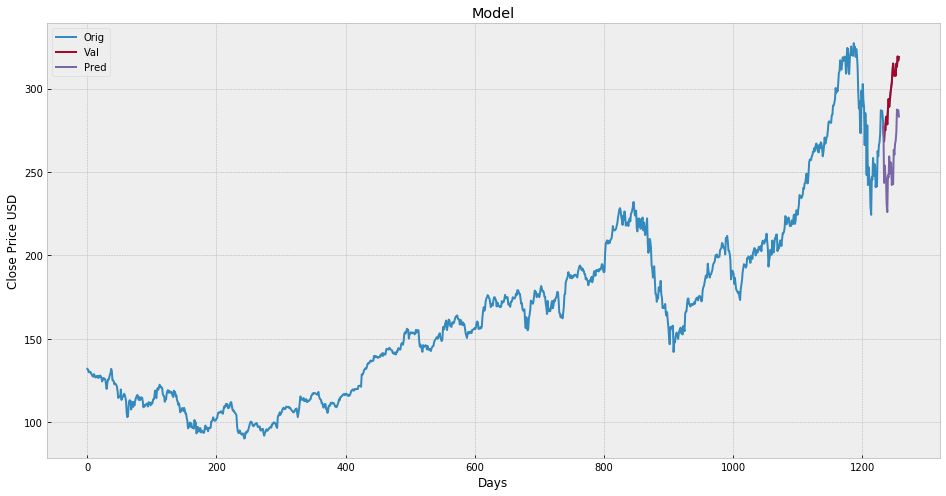

In [49]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')

plt.plot(df['close'])
plt.plot(valid[['close','Prediction']])
plt.legend(['Orig','Val','Pred'])

plt.show()